In [1]:
import timeit
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics

# Import algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
# Load data using the Pandas Library
df = pd.read_csv("data/VAW.csv")

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,DATAFLOW,FREQ: Frequency,TIME_PERIOD: Time,GEO_PICT: Pacific Island Countries and territories,TOPIC: Topic,INDICATOR: Indicator,SEX: Sex,AGE: Age,CONDITION: Women’s condition,VIOLENCE_TYPE: Type of violence,...,OUTCOME: Outcome,RESPONSE: Response,HELP_REASON: Reason for searching help,HELP_PROVIDER: Help provider,OBS_VALUE,UNIT_MEASURE: Unit of measure,UNIT_MULT: Unit multiplier,OBS_STATUS: Observation Status,DATA_SOURCE: Data source,OBS_COMMENT: Comment
0,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,CONT_ECON: At least one act of economic abusive,...,_T: Any,_T: Any,_T: Any,_T: Any,6.2,PERCENT: percent,NaN,NaN,FHSS,NaN
1,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,...,_T: Any,_T: Any,_T: Any,_T: Any,9.6,PERCENT: percent,NaN,NaN,FHSS,NaN
2,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,...,_T: Any,_T: Any,_T: Any,_T: Any,26.7,PERCENT: percent,NaN,NaN,FHSS,NaN
3,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,...,_T: Any,_T: Any,_T: Any,_T: Any,6.7,PERCENT: percent,NaN,NaN,FHSS,NaN
4,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,...,_T: Any,_T: Any,_T: Any,_T: Any,30.2,PERCENT: percent,NaN,NaN,FHSS,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 23 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   DATAFLOW                                            2016 non-null   object 
 1   FREQ: Frequency                                     2016 non-null   object 
 2   TIME_PERIOD: Time                                   2016 non-null   int64  
 3   GEO_PICT: Pacific Island Countries and territories  2016 non-null   object 
 4   TOPIC: Topic                                        2016 non-null   object 
 5   INDICATOR: Indicator                                2016 non-null   object 
 6   SEX: Sex                                            2016 non-null   object 
 7   AGE: Age                                            2016 non-null   object 
 8   CONDITION: Women’s condition                        2016 non-null   object 
 9

In [5]:
df["DATAFLOW"].value_counts()

SPC:DF_VAW(1.0)    2016
Name: DATAFLOW, dtype: int64

In [6]:
df["FREQ: Frequency"].value_counts()

A: Annual    2016
Name: FREQ: Frequency, dtype: int64

In [7]:
df["INDICATOR: Indicator"].value_counts()

NUMPERRF: Number of persons in relative frequency    2016
Name: INDICATOR: Indicator, dtype: int64

In [8]:
df["SEX: Sex"].value_counts()

F: Female    2016
Name: SEX: Sex, dtype: int64

In [9]:
df["AGE: Age"].value_counts()

Y15T64: 15-64    2016
Name: AGE: Age, dtype: int64

In [10]:
df["UNIT_MEASURE: Unit of measure"].value_counts()

PERCENT: percent    2016
Name: UNIT_MEASURE: Unit of measure, dtype: int64

In [11]:
df["UNIT_MULT: Unit multiplier"].value_counts()

Series([], Name: UNIT_MULT: Unit multiplier, dtype: int64)

In [12]:
df["UNIT_MULT: Unit multiplier"].isnull().sum()

2016

In [13]:
df["OBS_STATUS: Observation Status"].value_counts(dropna=False)

NaN                 1253
O: Missing value     763
Name: OBS_STATUS: Observation Status, dtype: int64

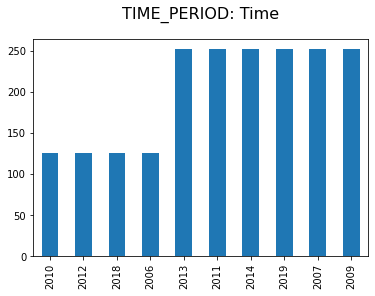

In [14]:
df["TIME_PERIOD: Time"].value_counts().sort_values().plot(kind = 'bar')
plt.title("TIME_PERIOD: Time", fontsize=16, pad=20)
plt.show()

In [15]:
# List of column names to be splitted
columns_list = ['GEO_PICT: Pacific Island Countries and territories','TOPIC: Topic','CONDITION: Women’s condition','VIOLENCE_TYPE: Type of violence','PERPETRATOR: Perpetrator','ACTUALITY: Actuality','LIFEPER: Period of life','OUTCOME: Outcome','RESPONSE: Response','HELP_REASON: Reason for searching help','HELP_PROVIDER: Help provider']

# Split the values of each column on ":" and keep the first part from the split result
for column in columns_list:
    df[column] = df[column].apply(lambda row: row.split(":")[0])

In [16]:
# Replace _T of any value in dataframe to NaN
df.replace(to_replace="_T", value=np.nan, inplace=True)

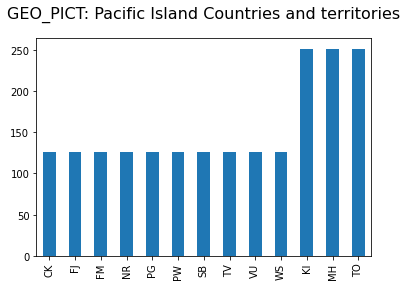

In [17]:
df["GEO_PICT: Pacific Island Countries and territories"].value_counts().sort_values().plot(kind = 'bar')
plt.title("GEO_PICT: Pacific Island Countries and territories", fontsize=16, pad=20)
plt.show()

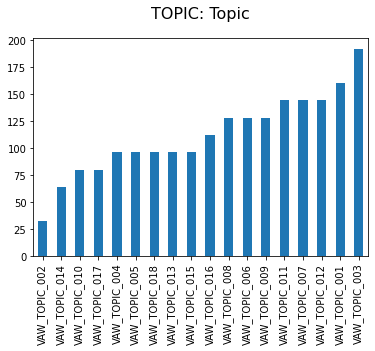

In [18]:
df["TOPIC: Topic"].value_counts().sort_values().plot(kind = 'bar')
plt.title("TOPIC: Topic", fontsize=16, pad=20)
plt.show()

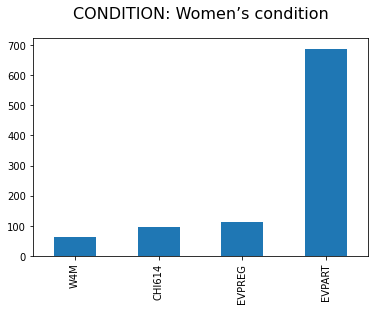

In [19]:
df["CONDITION: Women’s condition"].value_counts().sort_values().plot(kind = 'bar')
plt.title("CONDITION: Women’s condition", fontsize=16, pad=20)
plt.show()

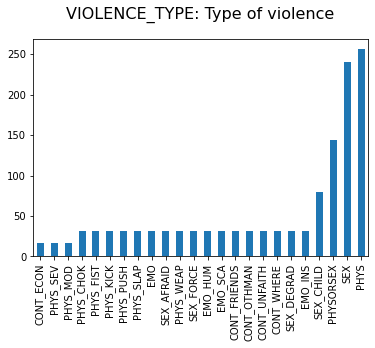

In [20]:
df["VIOLENCE_TYPE: Type of violence"].value_counts().sort_values().plot(kind = 'bar')
plt.title("VIOLENCE_TYPE: Type of violence", fontsize=16, pad=20)
plt.show()

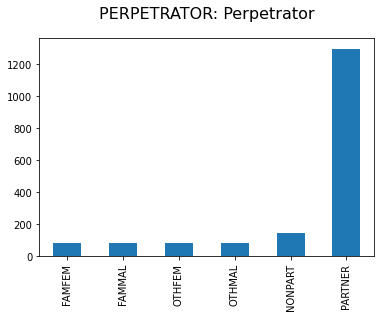

In [21]:
df["PERPETRATOR: Perpetrator"].value_counts().sort_values().plot(kind = 'bar')
plt.title("PERPETRATOR: Perpetrator", fontsize=16, pad=20)
plt.show()

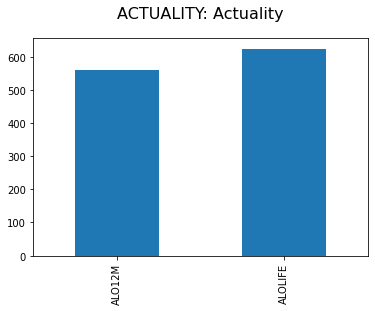

In [22]:
df["ACTUALITY: Actuality"].value_counts().sort_values().plot(kind = 'bar')
plt.title("ACTUALITY: Actuality", fontsize=16, pad=20)
plt.show()

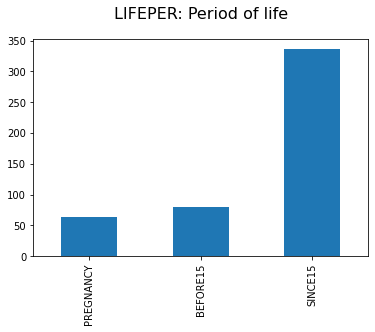

In [23]:
df["LIFEPER: Period of life"].value_counts().sort_values().plot(kind = 'bar')
plt.title("LIFEPER: Period of life", fontsize=16, pad=20)
plt.show()

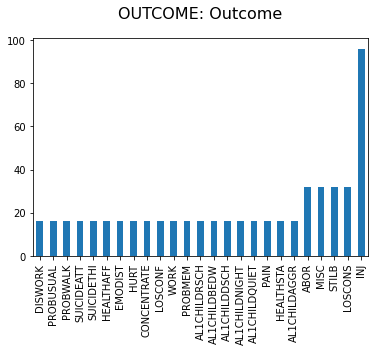

In [24]:
df["OUTCOME: Outcome"].value_counts().sort_values().plot(kind = 'bar')
plt.title("OUTCOME: Outcome", fontsize=16, pad=20)
plt.show()

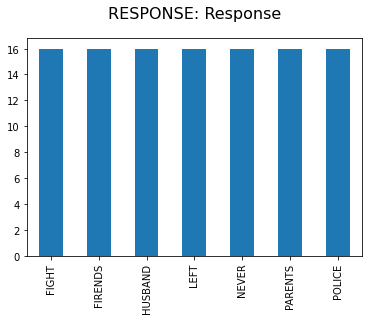

In [25]:
df["RESPONSE: Response"].value_counts().sort_values().plot(kind = 'bar')
plt.title("RESPONSE: Response", fontsize=16, pad=20)
plt.show()

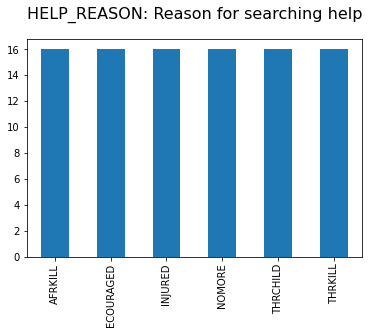

In [26]:
df["HELP_REASON: Reason for searching help"].value_counts().sort_values().plot(kind = 'bar')
plt.title("HELP_REASON: Reason for searching help", fontsize=16, pad=20)
plt.show()

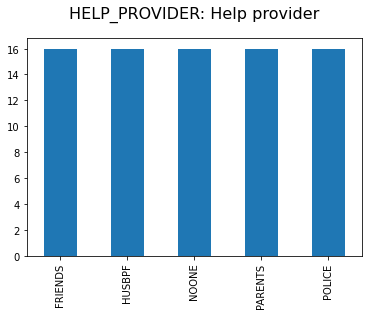

In [27]:
df["HELP_PROVIDER: Help provider"].value_counts().sort_values().plot(kind = 'bar')
plt.title("HELP_PROVIDER: Help provider", fontsize=16, pad=20)
plt.show()

In [28]:
df["OBS_VALUE"].value_counts(dropna=False)

NaN     782
0.0      21
0.1      11
6.7       9
10.3      9
       ... 
32.5      1
20.4      1
42.4      1
70.9      1
53.7      1
Name: OBS_VALUE, Length: 485, dtype: int64

In [29]:
# Drop columns DATAFLOW, FREQ: Frequency, INDICATOR: Indicator, SEX: Sex, AGE: Age,
# UNIT_MEASURE: Unit of measure, UNIT_MULT: Unit multiplier, OBS_STATUS: Observation Status
# OBS_COMMENT: Comment and "TIME_PERIOD: Time"
df.drop(["DATAFLOW", "FREQ: Frequency", "INDICATOR: Indicator", "SEX: Sex", "AGE: Age", "UNIT_MEASURE: Unit of measure", "UNIT_MULT: Unit multiplier", "OBS_STATUS: Observation Status", "OBS_COMMENT: Comment", "TIME_PERIOD: Time"], axis = 1, inplace=True)

In [30]:
# Make a copy of df to variable df_full
df_full = df.copy()

## Training when missing values OUTCOME are removed

In [31]:
# Drop rows which have a NaN (missing value) on column OUTCOME: Outcome
df.dropna(subset=["OUTCOME: Outcome"], axis=0, inplace=True)

In [32]:
df.shape

(544, 13)

In [33]:
# Check for the total amount of NaN values on each column
df.isnull().sum()

GEO_PICT: Pacific Island Countries and territories      0
TOPIC: Topic                                            0
CONDITION: Women’s condition                          288
VIOLENCE_TYPE: Type of violence                       400
PERPETRATOR: Perpetrator                              144
ACTUALITY: Actuality                                  400
LIFEPER: Period of life                               496
OUTCOME: Outcome                                        0
RESPONSE: Response                                    544
HELP_REASON: Reason for searching help                544
HELP_PROVIDER: Help provider                          544
OBS_VALUE                                             246
DATA_SOURCE: Data source                                0
dtype: int64

## Definition of the function for preparing the data for model

In [34]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(),
    SVC(),
    XGBClassifier(eval_metric="mlogloss")
]

scores_accuracy = []
scores_precision = []
scores_recall = []
scores_f1 = []

def prepare_data_for_model(df, impute):
    # Store features and target variable into 'X' and 'y'
    # Also we drop RESPONSE: Response, HELP_REASON: Reason for searching help and
    # HELP_PROVIDER: Help provider columns because all of their rows (544) have
    # missing values if impute variable is False
    if impute == False:
        X = df.drop(["OUTCOME: Outcome", "RESPONSE: Response", "HELP_REASON: Reason for searching help", "HELP_PROVIDER: Help provider"], axis=1)
    else:
        X = df.drop(["OUTCOME: Outcome"], axis=1)
    y = df["OUTCOME: Outcome"]
    
    # K-Fold Cross Validation to split all the samples in 10 groups of samples
    folds = KFold(n_splits=10, random_state=21, shuffle=True)
    
    for model in models:
        print(f"Model: {model.__class__.__name__}")
        start = timeit.default_timer()
        for train_index, test_index in folds.split(X, y):
            x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

            # Get all numerical and categorical column names
            numerical_columns = [col for col in x_train.columns if x_train[col].dtype != "O"]
            categorical_columns = [col for col in x_train.columns if x_train[col].dtype == "O"]

            # Seperate x_train and x_test into numerical features and categorical
            x_train_numerical = x_train[numerical_columns]
            x_test_numerical = x_test[numerical_columns]

            x_train_categorical = x_train[categorical_columns]
            x_test_categorical = x_test[categorical_columns]

            # Impute missing values of numerical features
            imp_numerical = KNNImputer()
            x_train_numerical = imp_numerical.fit_transform(x_train_numerical)
            x_test_numerical = imp_numerical.transform(x_test_numerical)

            # Impute missing values of categorical features
            imp_categorical = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
            x_train_categorical = imp_categorical.fit_transform(x_train_categorical)
            x_test_categorical = imp_categorical.transform(x_test_categorical)

            # Merge categorical and numerical features into x_train and x_test respectively
            x_train = pd.concat([
                pd.DataFrame(x_train_categorical, columns=categorical_columns),
                pd.DataFrame(x_train_numerical, columns=numerical_columns),
            ], axis=1)

            x_test = pd.concat([
                pd.DataFrame(x_test_categorical, columns=categorical_columns),
                pd.DataFrame(x_test_numerical, columns=numerical_columns)
            ], axis=1)

            # Encode categorical features using OneHotEncoder
            encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
            x_train = encoder.fit_transform(x_train)
            x_test = encoder.transform(x_test)

            # Scaling features using MinMaxScaler
            scaler = MinMaxScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
            
            # PCA is used to reduce dimensionality by adjusting the variance of the input that 
            # is expected to be explained by the produced components
            pca = PCA(n_components=0.95, random_state=0)
            x_train = pca.fit_transform(x_train)
            x_test = pca.transform(x_test)
            
            # Over Sampling (RandomOverSampler) is used to deal with the 
            # imbalance of classes in the dataset.
            over_sampling = RandomOverSampler()
            x_train, y_train = over_sampling.fit_resample(x_train, y_train)

            accuracy, precision, recall, f1 = train_evaluate_model(model, x_train, x_test, y_train, y_test)
            
            scores_accuracy.append(accuracy)
            scores_precision.append(precision)
            scores_recall.append(recall)
            scores_f1.append(f1)
        
        stop = timeit.default_timer()
        print(f"Total Training Time: {round(stop - start, 3)}\n")
        print(f"Average Accuracy Score: {round(np.average(scores_accuracy) * 100, 2)}%")
        print(f"Average Precision Score: {round(np.average(scores_precision) * 100, 2)}%")
        print(f"Average Recall Score: {round(np.average(scores_recall) * 100, 2)}%")
        print(f"Average F1 Score: {round(np.average(scores_f1) * 100, 2)}%")
        scores_accuracy.clear()
        scores_precision.clear()
        scores_recall.clear()
        scores_f1.clear()
        print(60*"=")

## Definition of the function for training and evaluating models

In [35]:
def train_evaluate_model(model, x_train, x_test, y_train, y_test):
    # Train the model
    model.fit(x_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(x_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average="macro")
    recall = metrics.recall_score(y_test, y_pred, average="macro")
    f1 = metrics.f1_score(y_test, y_pred, average="macro")
    
    return accuracy, precision, recall, f1

In [36]:
prepare_data_for_model(df, False)

Model: LogisticRegression
Total Training Time: 3.418

Average Accuracy Score: 16.16%
Average Precision Score: 6.99%
Average Recall Score: 5.77%
Average F1 Score: 5.97%
Model: DecisionTreeClassifier
Total Training Time: 1.406

Average Accuracy Score: 25.54%
Average Precision Score: 14.15%
Average Recall Score: 14.38%
Average F1 Score: 13.01%
Model: RandomForestClassifier
Total Training Time: 7.635

Average Accuracy Score: 19.28%
Average Precision Score: 8.93%
Average Recall Score: 7.86%
Average F1 Score: 7.89%
Model: KNeighborsClassifier
Total Training Time: 0.559

Average Accuracy Score: 16.0%
Average Precision Score: 6.99%
Average Recall Score: 5.8%
Average F1 Score: 6.01%
Model: GaussianNB
Total Training Time: 0.565

Average Accuracy Score: 23.9%
Average Precision Score: 12.57%
Average Recall Score: 14.78%
Average F1 Score: 11.49%
Model: MLPClassifier
Total Training Time: 39.825

Average Accuracy Score: 19.09%
Average Precision Score: 7.39%
Average Recall Score: 7.05%
Average F1 Scor

## Impute missing values of OUTCOME: Outcome (unlabeled data) using Clustering

In [36]:
df_full["OUTCOME: Outcome"].value_counts()

INJ              96
LOSCONS          32
STILB            32
MISC             32
ABOR             32
HEALTHSTA        16
PAIN             16
AL1CHILDQUIET    16
AL1CHILDNIGHT    16
AL1CHILDDSCH     16
AL1CHILDBEDW     16
AL1CHILDAGGR     16
DISWORK          16
WORK             16
LOSCONF          16
CONCENTRATE      16
HURT             16
EMODIST          16
HEALTHAFF        16
SUICIDETHI       16
SUICIDEATT       16
PROBWALK         16
PROBUSUAL        16
PROBMEM          16
AL1CHILDRSCH     16
Name: OUTCOME: Outcome, dtype: int64

In [37]:
unlabeled_df = df_full[df_full["OUTCOME: Outcome"].isna()]

X = unlabeled_df.drop(["OUTCOME: Outcome", "RESPONSE: Response", "HELP_REASON: Reason for searching help", "HELP_PROVIDER: Help provider"], axis=1)
y = unlabeled_df["OUTCOME: Outcome"]

In [38]:
# Get all numerical and categorical column names
numerical_columns = [col for col in X.columns if X[col].dtype != "O"]
categorical_columns = [col for col in X.columns if X[col].dtype == "O"]

In [39]:
# Seperate X into numerical features and categorical
X_numerical = X[numerical_columns]
X_categorical = X[categorical_columns]

In [40]:
# Impute missing values of numerical features
imp_numerical = KNNImputer()
X_numerical = imp_numerical.fit_transform(X_numerical)

In [41]:
# Impute missing values of categorical features
categorical_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X_categorical = categorical_imp.fit_transform(X_categorical)

In [42]:
# Merge categorical and numerical features into X variable
X = pd.concat([
    pd.DataFrame(X_categorical, columns=categorical_columns),
    pd.DataFrame(X_numerical, columns=numerical_columns),
], axis=1)

In [43]:
# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X = encoder.fit_transform(X)

In [44]:
# Scaling features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [45]:
# PCA is used to reduce dimensionality by adjusting the variance of the input that 
# is expected to be explained by the produced components
pca = PCA(n_components=0.95, random_state=0)
X = pca.fit_transform(X)

In [46]:
total_classes = len(df_full['OUTCOME: Outcome'].value_counts())
print(f"Total Classes: {total_classes}")

Total Classes: 25


In [47]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=25, random_state=0)
kmeans_model.fit(X)

KMeans(n_clusters=25, random_state=0)

In [48]:
np.set_printoptions(threshold=np.inf)
kmeans_model.labels_

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  8,  2,  2,  1, 24,  1, 24,  1,
       24,  1, 24,  1, 24,  1, 24, 12, 12, 12, 12, 12, 12, 23, 23, 23, 23,
       23, 23, 18,  2, 18,  2, 18,  2, 18,  2, 22, 22, 15, 15, 15, 15, 22,
       15, 15,  5, 14,  5, 14,  5, 14,  5, 14, 13,  9, 13,  9, 13,  9, 13,
        9,  4,  4,  4,  4,  4,  8,  8,  8,  8,  8,  8,  8, 10, 10, 10, 10,
       10,  3,  3,  3,  3,  3,  3, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20,  1, 20,  1, 20,  1, 20,  1, 20,  1, 20,  1, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 18, 20, 18, 20, 18, 20, 18, 20,
       22, 22,  6,  6,  6,  6, 22,  6,  6,  5, 20,  5, 20,  5, 14,  5, 14,
       13,  9, 13,  9, 13,  9, 13,  9,  4,  4,  4,  4,  4, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  8,  2,  2,  1, 24,  1, 24,  1, 24,  1, 24,
        1, 24,  1, 24, 12, 12, 12, 12, 12, 12, 23, 23, 23, 23, 23, 23, 18,
        2, 18,  2, 18,  2

In [49]:
keys = range(25)
values = [
    "HEALTHAFF", "AL1CHILDQUIET", "AL1CHILDAGGR", "AL1CHILDBEDW",
    "AL1CHILDNIGHT", "AL1CHILDRSCH", "AL1CHILDDSCH", "DISWORK",
    "SUICIDEATT", "ABOR", "MISC", "STILB", "HEALTHSTA", "HURT",
    "INJ", "LOSCONF", "LOSCONS", "PAIN", "PROBWALK", "PROBMEM",
    "PROBUSUAL", "EMODIST", "SUICIDETHI", "CONCENTRATE", "WORK"
]
dicts = {}

for i in keys:
    dicts[i] = values[i]

labels_names = []    

for index, label in enumerate(kmeans_model.labels_):
    for key, value in dicts.items():
        if label == key:
            labels_names.append(value)
            
unlabeled_df["OUTCOME: Outcome"] = labels_names

In [50]:
final_df = pd.concat([df, unlabeled_df])

In [51]:
final_df["OUTCOME: Outcome"].value_counts()

INJ              157
AL1CHILDAGGR     141
AL1CHILDNIGHT     96
ABOR              96
LOSCONS           90
SUICIDEATT        88
PROBWALK          84
AL1CHILDRSCH      80
HURT              80
MISC              77
AL1CHILDQUIET     76
HEALTHSTA         76
CONCENTRATE       76
DISWORK           73
PROBUSUAL         70
AL1CHILDBEDW      70
LOSCONF           70
WORK              70
HEALTHAFF         69
EMODIST           68
SUICIDETHI        64
PAIN              63
PROBMEM           62
STILB             62
AL1CHILDDSCH      58
Name: OUTCOME: Outcome, dtype: int64

In [53]:
prepare_data_for_model(final_df, True)

Model: LogisticRegression
Total Training Time: 8.156

Average Accuracy Score: 77.83%
Average Precision Score: 77.71%
Average Recall Score: 76.45%
Average F1 Score: 75.37%
Model: DecisionTreeClassifier
Total Training Time: 9.701

Average Accuracy Score: 71.38%
Average Precision Score: 71.34%
Average Recall Score: 70.28%
Average F1 Score: 69.2%
Model: RandomForestClassifier
Total Training Time: 36.067

Average Accuracy Score: 76.88%
Average Precision Score: 77.01%
Average Recall Score: 75.41%
Average F1 Score: 74.39%
Model: KNeighborsClassifier
Total Training Time: 2.979

Average Accuracy Score: 72.27%
Average Precision Score: 72.2%
Average Recall Score: 71.12%
Average F1 Score: 69.62%
Model: GaussianNB
Total Training Time: 2.973

Average Accuracy Score: 40.53%
Average Precision Score: 38.54%
Average Recall Score: 38.37%
Average F1 Score: 33.6%
Model: MLPClassifier
Total Training Time: 78.377

Average Accuracy Score: 76.14%
Average Precision Score: 76.15%
Average Recall Score: 74.7%
Aver

## Saving final dataset with filled values

In [52]:
# Get all numerical and categorical column names
numerical_columns = [col for col in final_df.columns if final_df[col].dtype != "O"]
categorical_columns = [col for col in final_df.columns if final_df[col].dtype == "O"]
categorical_columns.remove("OUTCOME: Outcome")

In [53]:
# Seperate final_df into numerical features and categorical
final_df_numerical = final_df[numerical_columns]
final_df_categorical = final_df[categorical_columns]

In [54]:
# Impute missing values of numerical features
imp_numerical = KNNImputer()
final_df_numerical = imp_numerical.fit_transform(final_df_numerical)

In [55]:
# Impute missing values of categorical features
categorical_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
final_df_categorical = categorical_imp.fit_transform(final_df_categorical)

In [65]:
# Merge categorical and numerical features into X variable
final_df = pd.concat([
    pd.DataFrame(final_df_categorical, columns=categorical_columns),
    pd.DataFrame(final_df_numerical, columns=numerical_columns),
    pd.DataFrame(final_df["OUTCOME: Outcome"], columns=["OUTCOME: Outcome"]),
], axis=1)

In [66]:
final_df.to_csv("data/VAW_FINAL.csv", index=False)